## Dynamic Circuits

#### A quantum circuit is a sequence of quantum operations — including gates, measurements, and resets — acting on qubits. In **Static Circuits**, if we wanted to do some conditional operation we wouldn't be able to do so as we had to measure at the end of the circuits.

#### For example, **Static Circuits** might only contain measurement operations at the end of the circuit. **Dynamic Circuits**, on the other hand, incorporate classical processing within the coherence time of the qubits. This means that **Dynamic Circuits** can make use of mid-circuit measurements and perform feed-forward operations, using the values produced by measurements to determine what gates to apply next.

![dynamiccircuit](./dynamic.png)


#### So we can perform a block of view one Quantum Operations do some sort of Measurement on some subset of Qubits and then affact the further operations on the  Qubits that are still coherent that they haven't been measured 

#### Dynamic circuits are also provably better than static circuits when it comes to preparing certain highly entangled quantum states for quantum simulation.

 #### For topological quantum order, we simulate a lattice of quantum spins that interact with nearby spins. Without dynamic circuits, performing this simulation would scale linearly with the lattice size; doubling the size of the lattice means doubling the size of the corresponding circuit. But with dynamic circuits, the corresponding circuit almost doesn’t grow as the lattice increases in size. This can provide an exponential speedup in terms of circuit depth.



### Before: Dynamic quantum circuit.

![static](./statis.png)


### After: Dynamic Quantum Circuit

![dynamic](./dynamic1.png)

In [1]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,Aer
from qiskit_ibm_provider import IBMProvider


In [6]:
sim=Aer.get_backend('aer_simulator')
# provider=IBMProvider()
# backend=provider.get_backend("ibm-")

In [11]:
qr=QuantumRegister(1,'q')
cr=ClassicalRegister(2,'c')
qc=QuantumCircuit(qr,cr)


In [12]:
qc.h(0)
qc.measure(qr,cr[0])
qc.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 2/══════╩═
           0

### Transpiler

#### Transpilation is the process of rewriting a given input circuit to match the topology of a specific quantum device,  and/or to optimize the circuit for execution on present day noisy quantum systems.
[Transpiler_vs_Barrier](https://youtu.be/CdoCPz6TC9k?list=PLOFEBzvs-VvodTtg75jH3t2levcnVlrkk)

In [16]:

from qiskit import transpile

trans=transpile(qc,sim)
trans.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 2/══════╩═
           0

#### Run Conditional dynamic circuit
 ---
 #### First excite the Qubit using X-gate(rotate $ 180^\degree $) and then we measure the state of the qubit. If the qubit results in 1 then we reset the qubit. 
 


In [127]:
qr=QuantumRegister(1,'q')
cr=ClassicalRegister(1,'result')
cm=ClassicalRegister(1,'measurement')
qc=QuantumCircuit(qr,cr,cm,name="reset")
sim=Aer.get_backend('aer_simulator')

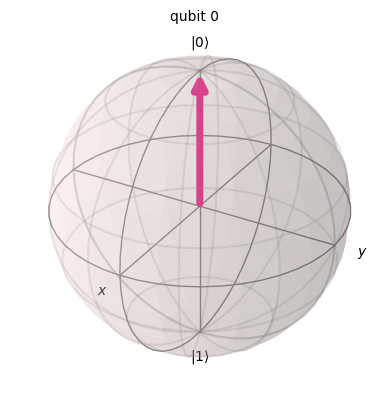

In [125]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(qc)



In [128]:
qc.x(0)
# plot_bloch_multivector(qc)
qc.measure(0,cr)
qc.draw()


┌───┐┌─┐
            q: ┤ X ├┤M├
               └───┘└╥┘
     result: 1/══════╩═
                     0 
measurement: 1/════════

In [129]:
with qc.if_test((cr,1)):
    print("hello")
    qc.reset(0)
qc.measure(0,cm)

hello


In [130]:
qc=transpile(qc,sim,initial_layout=[0])
qc.draw()

┌───┐┌─┐┌──────────┐┌─┐
           q ┤ X ├┤M├┤0         ├┤M├
             └───┘└╥┘│  If_else │└╥┘
     result: ══════╩═╡0         ╞═╬═
                     └──────────┘ ║ 
measurement: ═════════════════════╩═

In [131]:
ressim=sim.run(qc)
print(ressim.job_id())

1cbc843f-baa3-4294-99ab-0945a295a8c2


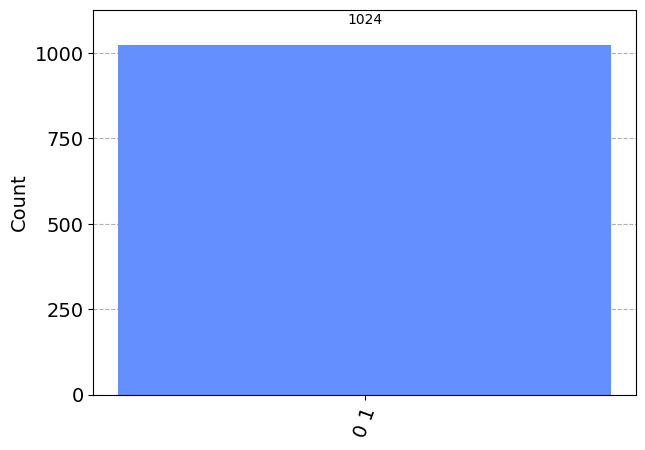

In [132]:
from qiskit.visualization import plot_histogram
count=ressim.result()
res=count.get_counts()
plot_histogram(res)

In [ ]:
qc_job=sim.run(qc)

In [195]:
qr=QuantumRegister(1,'q')
cc=ClassicalRegister(2)

qr.size
qc=QuantumCircuit(qr,cc)
qc.initialize([0,1],qr[0])
# qc.x(qr[0])


qc.draw()

┌─────────────────┐
   q: ┤ Initialize(0,1) ├
      └─────────────────┘
c4: 2/═══════════════════

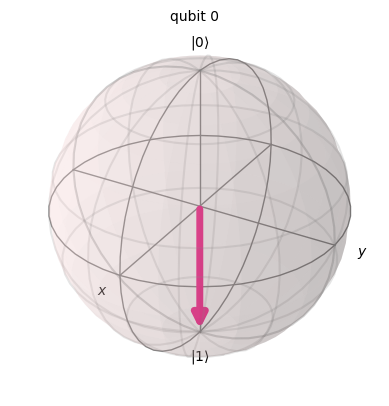

In [196]:
plot_bloch_multivector(qc)

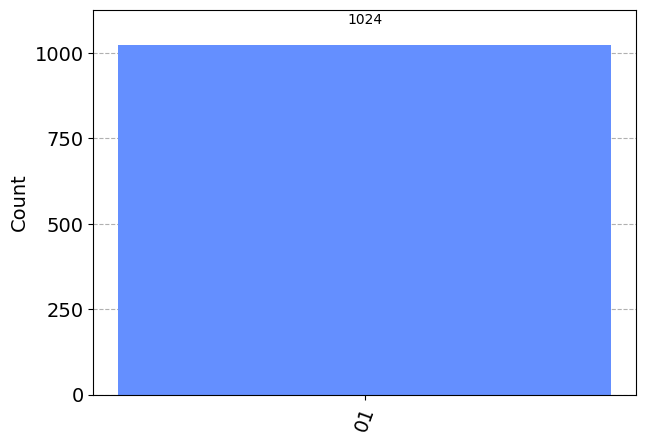

In [197]:
qc.measure(qr[0],cc[0])

res=sim.run(qc).result()
count=res.get_counts()
plot_histogram(count)

In [198]:
qc.draw()

┌─────────────────┐┌─┐
   q: ┤ Initialize(0,1) ├┤M├
      └─────────────────┘└╥┘
c4: 2/════════════════════╩═
                          0

hello


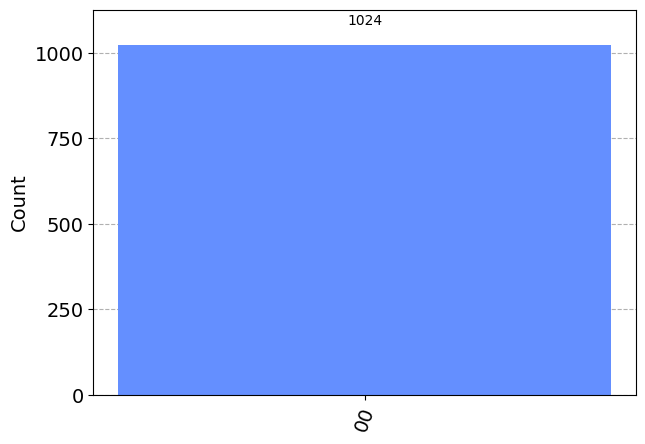

In [194]:
with qc.if_test((cc[0],1)):
    print("hello")
    qc.reset(qr[0])

qc.measure(qr[0],cc[1])


res=sim.run(qc).result()
count=res.get_counts()
plot_histogram(count)

In [189]:
qc.draw()

┌─────────────────┐┌─┐┌──────────┐┌─┐
   q: ┤ Initialize(0,1) ├┤M├┤0         ├┤M├
      └─────────────────┘└╥┘│  If_else │└╥┘
c2_0: ════════════════════╩═╡0         ╞═╬═
                            └──────────┘ ║ 
c2_1: ═══════════════════════════════════╩═

### Conditional Reset In IBM 

#### These instructions are comprised of a not-gate conditioned on the measurement outcome of the qubit, and demonstrate the real-time compute power of the IBM Quantum systems. They can be explored for the reuse of qubits in a circuit, to yield an increase in system throughput, and provide fidelity improvements over standard cavity-cooling methods. 

[What is Reset Do](https://youtu.be/WxyCD8JLByw?list=RDCMUClBNq7mCMf5xm8baE_VMl3A)


### Single-qubit reset experiment

#### We perform the following sequences of one-qubit operations: h -> x -> measure and h -> reset -> x -> measure. Without reset, the expected result of the first circuit is $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$  and a uniform distribution of 0 and 1 bits at the output. However, when the reset is included, the superposition prepared by the Hadamard gate is reset to  and the X-gate performs a bit flip to .

In [48]:
import numpy as np
import matplotlib.pyplot as plt

import qiskit
from qiskit import IBMQ, QuantumCircuit, execute, assemble, schedule, transpile
from qiskit.providers.ibmq.job import job_monitor
from qiskit.tools.visualization import plot_histogram


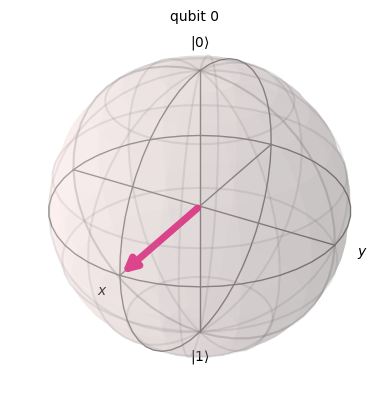

In [49]:
qcc=QuantumCircuit(1)
qcc.h(0)
qcc.x(0)
plot_bloch_multivector(qcc)

#### We run this experiment on qubit 0, with 0, 1, 3, and 5 **reset** operations. We see clear improvement after a single reset and further improvement with 3 resets. By 5 resets the improvement in the qubit state preparation has mostly saturated, and the final fidelity is close to the measurement fidelity of the qubit under consideration.

In [50]:
h_x_circ = QuantumCircuit(1, 1)
h_x_circ.h(0)
h_x_circ.x(0)
h_x_circ.measure(0, 0)

def h_reset_x_circ(n_resets):
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.reset([0]*n_resets)
    qc.x(0)
    qc.measure(0,0)
    return qc

In [51]:
circs0 = [h_x_circ, h_reset_x_circ(1), h_reset_x_circ(3), h_reset_x_circ(5)]
job1q_0 = execute(circs0, sim, initial_layout=[0])
job_monitor(job1q_0)

Job Status: job has successfully run


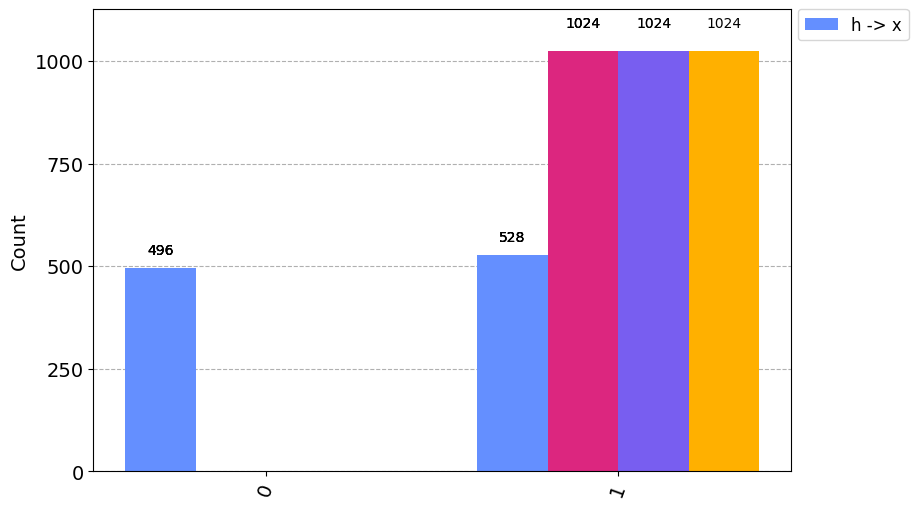

In [52]:
counts1 = job1q_0.result().get_counts()

legend_1q = ['h -> x', 'h -> reset -> x', 'h -> 3*reset -> x', 'h -> 5*reset -> x' ]
plot_histogram(counts1, legend=legend_1q, figsize=(9, 6))

## Single-qubit circuit with reset
#### we combine the ability to reset qubits with mid-circuit measurements. This enables qubit reuse and is a first step in providing control flow in the future.

#### We perform the sequence h(0) -> measure(0) -> reset(0) [n times] -> x(0) -> measure(0). Without reset, we expect 50/50 0s and 1s after both the first measurement and the second measurement.

#### However, when the reset is included, the superposition prepared by the Hadamard gate is reset to $|0\rangle$ . The X gate then flips the state, so after the second measurement we expect all 1s rather than an even distribution.

In [159]:
config=sim.configuration()
n_qubits=config.n_qubits
print(n_qubits)
def h_reset_x_circ(n_resets, qubit=0):
    qc = QuantumCircuit(n_qubits, 2)
    qc.h(qubit)
    qc.measure(qubit, [0])
    qc.reset([qubit]*n_resets)
    qc.x(qubit)
    qc.measure(qubit, [1])
    return qc

28


In [160]:
cirs=[h_reset_x_circ(0),h_reset_x_circ(1),h_reset_x_circ(3)]

In [161]:
from qiskit import execute

jobs=execute(cirs,backend=sim,optimization_level=0)

In [164]:
from qiskit.result import marginal_counts
job1_0=marginal_counts(jobs.result(),indices=[0]).get_counts()
job1_1=marginal_counts(jobs.result(),indices=[1]).get_counts()
print(job1_0,job1_1)

[{'1': 543, '0': 481}, {'1': 525, '0': 499}, {'1': 505, '0': 519}] [{'0': 543, '1': 481}, {'1': 1024}, {'1': 1024}]


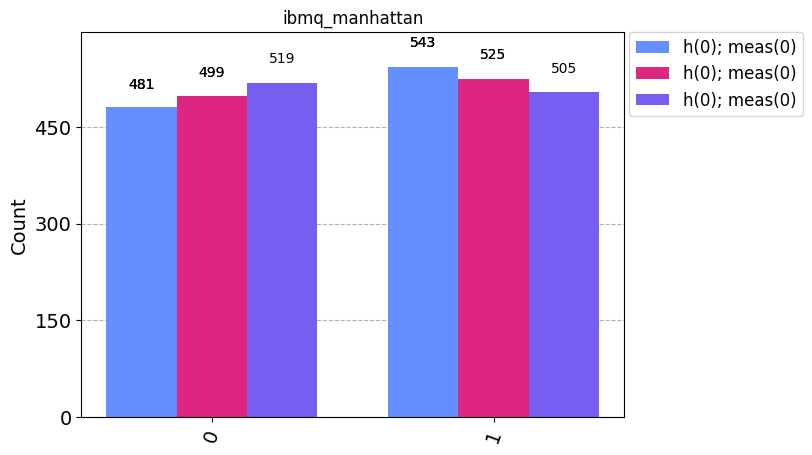

In [165]:
plot_histogram(job1_0, legend=['h(0); meas(0)', 'h(0); meas(0)', 'h(0); meas(0)'], 
               title="ibmq_manhattan")

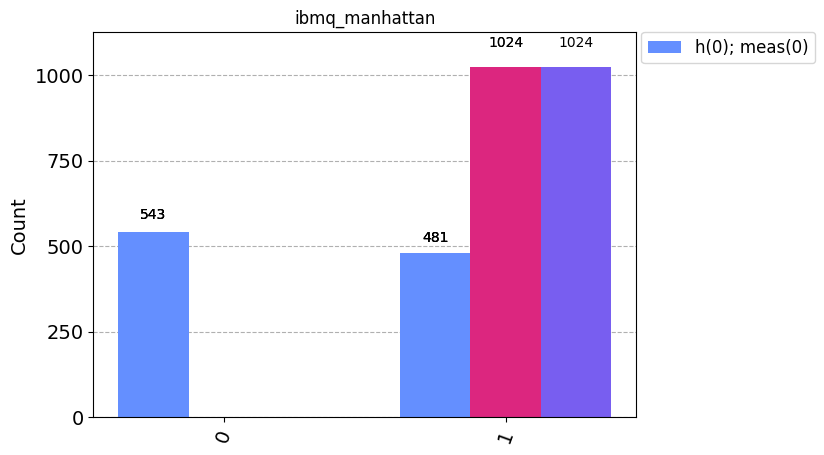

In [166]:
plot_histogram(job1_1, legend=['h(0); meas(0)', 'h(0); meas(0)', 'h(0); meas(0)'], 
               title="ibmq_manhattan")

### Multi-qubit reset experiment

#### Without any reset instructions, we expect a unifrom distribution across 4 of the computational basis states ($|000\rangle$,$|001\rangle$,$|010\rangle$,$|011\rangle$ ). With reset added, we expect nearly all counts in the  state.

In [53]:
def multiq_custom_circ(n_resets):
    """Multi-qubit circuit on qubits 0, 1, 2 with ``n_resets`` reset instructions used."""
    qc = QuantumCircuit(3, 3)
    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.reset([0]*n_resets)
    qc.cx(0, 2)
    qc.reset([1]*n_resets)
    qc.x(1)
    qc.measure(range(2), range(2))
    return qc


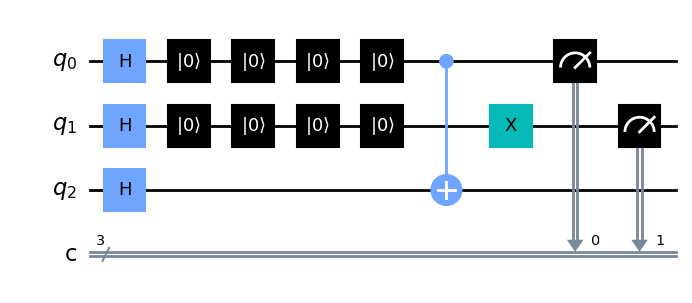

In [54]:
multiq_circs = [multiq_custom_circ(0), multiq_custom_circ(1), multiq_custom_circ(3)]

aa=multiq_custom_circ(4)
aa.draw(output="mpl")

In [214]:
from qiskit import Aer
job_multiq_sim = execute(multiq_circs, 
                         backend=Aer.get_backend('qasm_simulator'))
counts_multiq_sim = job_multiq_sim.result().get_counts()
print("No reset sim counts, custom circ: ", counts_multiq_sim[0])
print("1 Reset sim counts, custom circ: ", counts_multiq_sim[1])

No reset sim counts, custom circ:  {'001': 259, '010': 244, '000': 269, '011': 252}
1 Reset sim counts, custom circ:  {'010': 1024}


In [216]:
job_multiq = execute(multiq_circs, sim)
job_monitor(job_multiq)


Job Status: job has successfully run


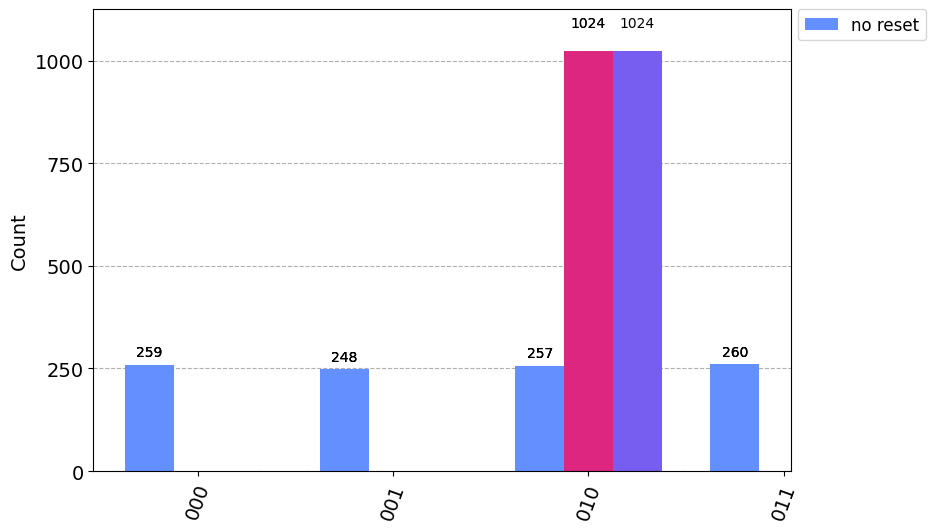

In [217]:
counts_multiq = job_multiq.result().get_counts()
legend_multiq = ['no reset', '1 reset', '3 resets']
plot_histogram(counts_multiq, legend=legend_multiq, figsize=(9, 6))

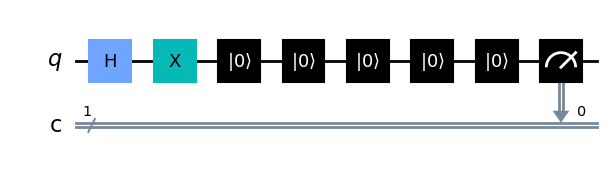

In [46]:
qc=QuantumCircuit(1,1)
qc.h(0)
qc.x(0)
# qc.h(0)
qc.reset([0]*5)
qc.measure(0,0)
qc.draw(output="mpl")

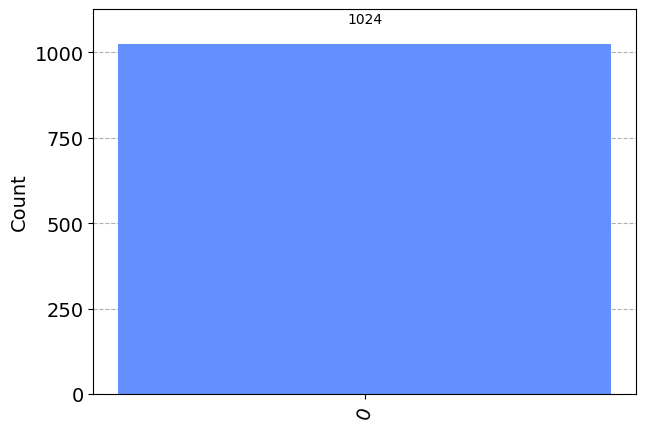

In [230]:
res=sim.run(qc).result()
count=res.get_counts()
plot_histogram(count)

## Dynamic circuits basics with Qiskit


In [236]:
from qiskit_ibm_provider import IBMProvider
# IBMProvider.save_account("515d40d7390ad00fa964008d996a10241d9484065e089728203df9254d935ce48662f809d09e3aff8d4cc2db5ea3eefdf4e4ec03af12dd8862bd8666e00c65d7")
# IBMProvider.lo
provider=IBMProvider()
backend=provider.get_backend("ibm_perth",instance="ibm-q/open/main")

In [238]:
backend.name


'ibm_perth'

## Entangled State

#### Quantum entanglement is the phenomenon that occurs when a group of particles are generated, interact, or share spatial proximity in a way such that the quantum state of each particle of the group cannot be described independently of the state of the others, including when the particles are separated by a large distance

## Maximally Entangled State

#### The bipartite maximally entangled state $|\psi\rangle_{AB}$ is the one for which the reduced density operators are maximally mixed $\rho A = \rho B= I/d$

#### A multiple state $|\psi\rangle$ of a system $S$ is called absolutely maximally entangled if for any bipartition $A/B$ of $S$ is reduced density operator is maximally mixed $\rho A= \rho B= I/d$ where $d=min\{d_A,d_B \}$


## Born Rule

####  It states that the probability density of finding a system in a given state, when measured, is proportional to the square of the amplitude of the system's wavefunction at that state. 

#### A wave function $\psi$ for a single structureless particle in space position $(x,y,z)$ implies that the probability density function $p$ for a measurement of the particle's position at time $t_0$ is:

### $p(x,y,z,t_0)=| \psi(x,y,z,t_0)|^2$


## Eigenvalues and Eigenvectors

#### In linear algebra, an eigenvector or characteristic vector of a linear transformation is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it. 

### [Eigenvectors&Eigenvalues](https://www.youtube.com/watch?v=PFDu9oVAE-g&pp=ygUrZWlnZW52ZWN0b3JzIGFuZCBlaWdlbnZhbHVlcyAzIGJsdWUgMSBicm93bg%3D%3D)

#### If $T$ is a linear transformation from a vector space $V$ over a feild $F$ into itself and $v$ is a nonzero vector in $V$ then $v$ is an eigenvector of $T$ if $T(v)$ is a scalar multiple of $v$ 

### $T(v)=\lambda v$

### Example of Eigenvector and Eigenvalue

![eigenvector-eigenvalue](./Mona_Lisa_eigenvector_grid.png)

#### In this shear mapping the red arrow changes direction, but the blue arrow does not. The blue arrow is an eigenvector of this shear mapping because it does not change direction, and since its length is unchanged, its eigenvalue is 1.

#### Linear transformations can take many different forms, mapping vectors in a variety of vector spaces, so the eigenvectors can also take many forms. The linear transformation can be differential operator like **$\frac{d}{dx}$**

### $\frac{d}{dx} e^{\lambda x}=\lambda e^{\lambda x}$

#### Alternatively, the linear transformation could take the form of an n by n matrix, in which case the eigenvectors are n by 1 matrices

![eigen](./Eigenvectors_of_a_linear_operator.gif)

#### A 2×2 real and symmetric matrix representing a stretching and shearing of the plane. The eigenvectors of the matrix (red lines) are the two special directions such that every point on them will just slide on them.


### more about **[Eigenvector and Eigenvalue](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)**


#### Eigenvalues and Eigenvectors of Unitary matrices are special 

### $U|x\rangle=\lambda_x |x\rangle$

#### $\lambda_x $ is Eigenvalue and $|x\rangle$ Eigenvectors. So the Eigenvalue has to be  of the form $e^{i\theta}$  

#### The Eigenvalue  has to be Complex Number that has magnitude $One$ . When we apply a **Unitary Operator** what we are  doing is effectively applying a phase onto it's Eigenvector. All the Unitary matrix is doing is adding a global phase onto the particular Eigenvector.

#### If we have two Eigenvalues $\lambda_x$ and $\lambda_y$. If the are not equal to each other $\lambda_x \neq \lambda_y$ then we can say that the corresponding Eigenvector $|x\rangle , |y\rangle$ are **Orthogonal**. If we take dot product or inner product of $x,y$ then it's zero $\langle x|y\rangle=0$ 





## Density Operator
#### A Density Matrix (or density operator) is a matrix that describes the quantum state of a physical system. It allows for the calculation of the probabilities of the outcomes of any measurement performed upon this system, using the Born rule. Corresponding eigenvalue is often denoted by $\lambda$ s the factor by which the eigenvector is scaled.

####  Mixed states arise in quantum mechanics in two different situations: 

### 1.When the preparation of the system is not fully known, and thus one must deal with a statistical ensemble of possible preparations
### 2.When one wants to describe a physical system which is entangled with another, without describing their combined state.


#### $Density Operator  System$ 

### It has 3 properties 
#### **1.Semi-definite**
#### **2.Hermitian**
#### **3. Trace one**


#### a situation where each pure state $|\psi_j\rangle$ is prepared with probability $p_j$,describing an ensemble of pure states. The probability of obtaining projective measurement result $m$ when using projections $\prod_m$ is given by 

### $p(m)=\sum_j p_j \langle \psi_j | \prod_m|\psi_j\rangle= tr [\prod_m(\sum_j p_j|\psi_j\rangle \langle \psi_j|)]$

### $\rho=\sum_j p_j|\psi_j\rangle\langle\psi_j|$


#### Let $|\psi\rangle$ be pure entangled state in the composite **Hilbert space** $H_1 \otimes H_2$. The probability of obtaining measurement result $m$ when measuring projectors $\prod_m$ on **Hilbert Space** $H_1$ alone is given by 

### $p(m)=\langle\psi|\prod_m\otimes I|\psi\rangle=tr[\prod_m(tr_2|\psi\rangle\langle\psi|)]$

#### where $tr_2$ denotes the partial trace 
#### This makes the operator 

### $\rho=tr_2 |\psi\rangle\langle\psi|$


## Pure states


#### A pure quantum state is a state that can not be written as a probabilistic mixture, or convex combination, of other quantum states.

####  A density operator represents a pure state if and only if: it can be written as an outer product of a state vector $|\psi \rangle$  with itself, that is

### $\rho=|\psi\rangle\langle\psi|$

### it is a projection, in particular of rank one.

### it is idempotent, that is $\displaystyle \rho =\rho ^{2}$

### It has peurity 1

### $tr(\rho)^2=1$


## Mixed State

#### If a physical system is prepared to be either in state  $|\psi_1\rangle$ or $|\psi_2\rangle$with equal probability, it can be described by the mixed state

### $\rho=\frac{1}{2}\begin{pmatrix}1 &1 \\ 1& 1\end{pmatrix}$


#### where $|\psi_1\rangle$ and $|\psi_2\rangle$ are assumed to be orthogonal and dimension  2.

#### a quantum superposition of these two states with equal probability amplitudes results in the pure state $|\psi\rangle=(|\psi_1\rangle+|\psi_2\rangle)/ \sqrt{2}$ with density matrix 

### $|\psi\rangle\langle\psi|=\frac{1}{2}\begin{pmatrix}1 &1 \\ 1& 1\end{pmatrix}$

### **An arbitrary state for a qubit can be written as a linear combination of the Pauli matrices, which together with the identity matrix provide a basis for $2\times 2$ self-adjoint matrice**

###  $\rho=\frac{1}{2}(I+r_x\sigma_x+r_y\sigma_y+r_z\sigma_z)$ 

#### where the real numbers $(r_x,r_y,r_z)$ are the co-ordinates of a point withing the unit ball and 

### $\sigma_x=\begin{pmatrix}0&1\\1&0\end{pmatrix} ,\sigma_y=\begin{pmatrix}0&-\imath\\\imath&0\end{pmatrix}, \sigma_z=\begin{pmatrix}1&0\\0&-1\end{pmatrix} $

### Points with $r_x^2+r_y^2+r_z^2=1$ **Surface of Bloch Sphere**   represent on the  **Pure States**, while the **Mixed States** are represented by points in the **Interior**
![Pure-And-Mixed-State-on-Bloch-Sphere](Bloch_sphere.svg)

#### In the Bloch sphere representation of a qubit, each point on the unit sphere stands for a pure state. All other density matrices correspond to points in the interior.

## Partial Trace or Reduced Density Matrix


#### If we have a systm $A$ and a system $B$ and they combined as $\rho_{AB}$ then this forms a Density Matrix. In any case we need to ignore the $B$ system or if we want to trace out system $B$ then we would like to have a description of the density matrix of the system that is associated with $A$ only $\rho_A$. This is called reduced density system $\rho_A$ associated with the state $\rho _{AB}$ on system $A$


### $\rho_A=Tr_B=\sum\limits_{v=0}^M ( (I_A\otimes \langle X_v |) \rho_{AB}(I_A\otimes |X_v\rangle))$
### $\rho_B=Tr_A=\sum\limits_{u=0}^N ((\langle \phi_u| \otimes I_B) \rho_{AB}(|\phi_u\rangle \otimes I_B))$




### $|\psi\rangle=\frac{1}{\sqrt{2}}(|0_A0_B\rangle +|1_A1_B\rangle)$
### $\rho_{AB}=|\psi\rangle \langle \psi|$
### $\rho_{AB}=\frac{1}{2}(|0_A0_B\rangle\langle 0_A0_B|+|0_A0_B\rangle\langle 1_A1_B|+|1_A1_B\rangle\langle 0_A0_B|+|1_A1_B\rangle\langle1_A1_B|)$ 
### $\{ |\psi_u\rangle \}_{u=0}^1=\{ |0\rangle, |1\rangle$ \}
### $\{ |X_u\rangle \}_{v=0}^1=\{ |0\rangle, |1\rangle$ \}

### $\rho_B=Tr_A(\rho_{AB})=\sum\limits_{u=0}^N ((\langle \phi_u| \otimes I_B) \rho_{AB}(|\phi_u\rangle \otimes I_B))$

### $I_B=\begin{bmatrix} 1 & 0\\ 0 &1\end{bmatrix}=|0\rangle\langle0|+|1\rangle\langle1|$

### $=[\langle0_A|\otimes(|0\rangle\langle0|+|1\rangle\langle1|)]\rho_{AB}[|0_A\rangle\otimes(|0\rangle\langle0|+|1\rangle\langle1|)]+[\langle1_A|\otimes(|0\rangle\langle0|+|1\rangle\langle1|)]\rho_{AB}[|1_A\rangle\otimes(|0\rangle\langle0|+|1\rangle\langle1|)]$

### We can write 
### $\langle0_A| |0_B\rangle\langle 0_B|=|0_B\rangle\langle 0_A0_B|$

### Now
### $=[(|0_B\rangle\langle0_A0_B|+|1_B\rangle\langle0_A1_B|)]\rho_{AB}[(|0_A0_B\rangle\langle0_B|+|0_A1_B|\rangle\langle1_B|)]+[(|0_B\rangle\langle1_A0_B|+|1_B\rangle\langle1_A1_B|)]\rho_{AB}[(|1_A0_B\rangle\langle0_B|+|1_A1_B|\rangle\langle1_B|)]$

### Again we can write 

### $(|0_B\rangle\langle0_A0_B|+|1_B\rangle\langle0_A1_B|)\rho_{AB}$ 
### $=(|0_B\rangle\langle0_A0_B|+|1_B\rangle\langle0_A1_B|) \frac{1}{2}(|0_A0_B\rangle\langle 0_A0_B|+|0_A0_B\rangle\langle 1_A1_B|+|1_A1_B\rangle\langle 0_A0_B|+|1_A1_B\rangle\langle1_A1_B|)$

### Now if we do multiplication here we will get
### $=\frac{1}{2}|0_B\rangle\langle0_A0_B|0_A0_B\rangle\langle 0_A0_B|+|0_B\rangle\langle0_A0_B|0_A0_B\rangle\langle 1_A1_B|+|0_B\rangle\langle0_A0_B|1_A1_B\rangle\langle 0_A0_B|+|0_B\rangle\langle0_A0_B|1_A1_B\rangle\langle1_A1_B|+|1_B\rangle\langle0_A1_B|0_A0_B\rangle\langle 0_A0_B|+|1_B\rangle\langle0_A1_B|0_A0_B\rangle\langle 1_A1_B|+|1_B\rangle\langle0_A1_B|1_A1_B\rangle\langle 0_A0_B|+|1_B\rangle\langle0_A1_B|1_A1_B\rangle\langle1_A1_B|$

### As these are the orthogonal state then $\langle0|0\rangle=1, \langle1|1\rangle=1, \langle0|1\rangle=0,\langle1|0\rangle=0$

### So now 

### $=\frac{1}{2}|0_B\rangle\langle 0_A0_B|+|0_B\rangle\langle 1_A1_B|+0+0+0+0+0+0$
### $=\frac{1}{2}|0_B\rangle\langle 0_A0_B|+|0_B\rangle(\langle1_A|\otimes \langle1_B|)$

### $=\frac{1}{2}|0_B\rangle\langle 0_A0_B|+\langle1_A|0_B\rangle \otimes \langle1_B|0_B\rangle$
### $=\frac{1}{2}|0_B\rangle\langle 0_A0_B|$

### Now  Calculate
### $[|0_B\rangle\langle0_A0_B|+|1_B\rangle\langle0_A1_B|)]\rho_{AB}[|0_A0_B\rangle\langle0_B|+|0_A1_B|\rangle\langle1_B|]$

### $=\frac{1}{2}|0_B\rangle\langle 0_A0_B| [|0_A0_B\rangle\langle0_B|+|0_A1_B|\rangle\langle1_B|]$
### $=\frac{1}{2} |0_B\rangle\langle 0_A0_B|0_A0_B\rangle\langle0_B|+ |0_B\rangle\langle 0_A0_B|0_A1_B|\rangle\langle1_B|$
### $=\frac{1}{2}|0_B\rangle\langle0_B|$

### Similarly

### $[(|0_B\rangle\langle1_A0_B|+|1_B\rangle\langle1_A1_B|)]\rho_{AB}[(|1_A0_B\rangle\langle0_B|+|1_A1_B|\rangle\langle1_B|)]$
### $=\frac{1}{2}|1_B\rangle\langle1_B|$


### Finally

### $\rho_B=Tr_A(\rho_{AB})=\sum\limits_{u=0}^N ((\langle \phi_u| \otimes I_B) \rho_{AB}(|\phi_u\rangle \otimes I_B))$
### $=\frac{1}{2}(|0_B\rangle\langle0_B|+|1_B\rangle\langle1_B|)$
### $=\frac{1}{2}\begin{bmatrix}1 &0 \\ 0&1\end{bmatrix}$

In [8]:
import numpy as np
a=np.array([1,0])
b=np.array([[1,0],[0,0]])
np.kron(a,b)

array([[1, 0, 0, 0],
       [0, 0, 0, 0]])

## Introduction to Qiskit


In [3]:
from qiskit_ibm_provider import IBMProvider
# IBMProvider.save_account("515d40d7390ad00fa964008d996a10241d9484065e089728203df9254d935ce48662f809d09e3aff8d4cc2db5ea3eefdf4e4ec03af12dd8862bd8666e00c65d7")
# IBMProvider.lo
provider=IBMProvider()
backend=provider.get_backend("ibmq_jakarta",instance="ibm-q/open/main")

### Bell States

---
#### Bell states are the four states that can be created when maximally entangled. The four states are represented as:

### $|\phi^+\rangle=\frac{|00\rangle+|11\rangle}{\sqrt{2}}$

### $|\phi^-\rangle=\frac{|00\rangle-|11\rangle}{\sqrt{2}}$

### $|\psi^+\rangle=\frac{|01\rangle+|10\rangle}{\sqrt{2}}$
### $|\psi^+\rangle=\frac{|01\rangle-|10\rangle}{\sqrt{2}}$

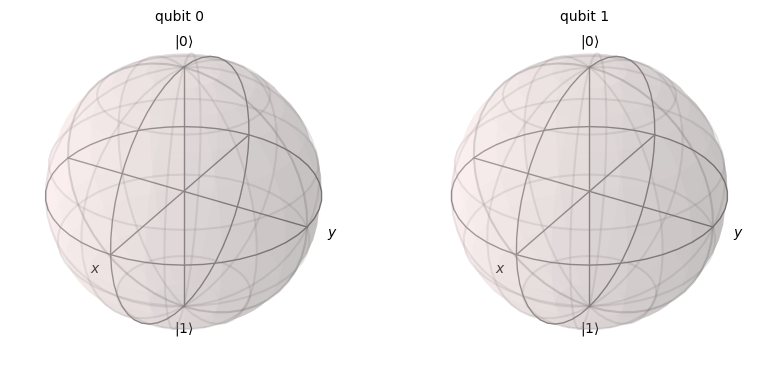

In [1]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit.visualization import plot_bloch_multivector,plot_histogram
cr=ClassicalRegister(1,'cc')
qr=QuantumRegister(2,'a')

qc=QuantumCircuit(qr,cr)

qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.draw()
plot_bloch_multivector(qc)

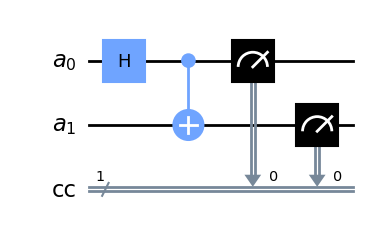

In [116]:
qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[0])
qc.draw(output="mpl")

In [129]:
from qiskit import Aer
sim=Aer.get_backend('aer_simulator')

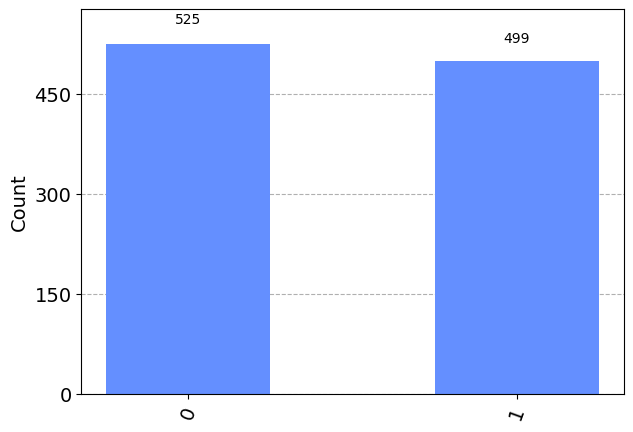

In [130]:
res=sim.run(qc).result()

count=res.get_counts()
plot_histogram(count)


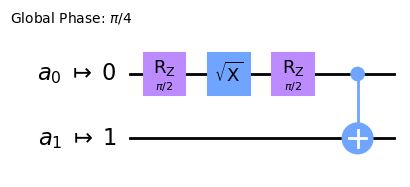

In [4]:
#run in ibm quantum computer
# . The transpiler rewrites an abstract quantum circuit into 
# a functionally equivalent one that matches the constraints and 
# characteristics of a specific target quantum device.
from qiskit import transpile
qc_bell=transpile(qc,backend)
qc_bell.draw(output="mpl", idle_wires=False)


In [6]:
from qiskit.tools.monitor import job_monitor
bell_job=backend.run(qc_bell,shots=1000,dynamic=True)
# print(f"runtime job id:{bell_job.job_id()}")

In [120]:
job_monitor(bell_job)


Job Status: job has successfully run


In [123]:
bell_result=bell_job.result()
count=bell_result.get_counts(0)

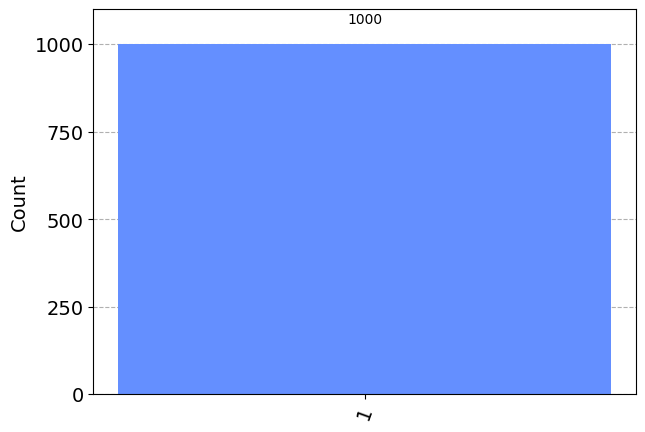

In [124]:
plot_histogram(count)

## Mid-circuit measurements with dynamic circuits

#### Measurements are done to gather information about the final state of a quantum system in the form of a discrete probability distribution in the computational basis.  IBM Quantum users can perform multiple measurements in a circuit and at any point throughout the circuit. This enables immediate use cases such as heralding and monitoring qubit evolution.

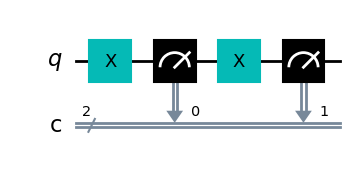

In [126]:
qc_mid=QuantumCircuit(1,2)
qc_mid.x(0)
qc_mid.measure(0,0)
qc_mid.x(0)
qc_mid.measure(0,1)
qc_mid.draw(output='mpl')

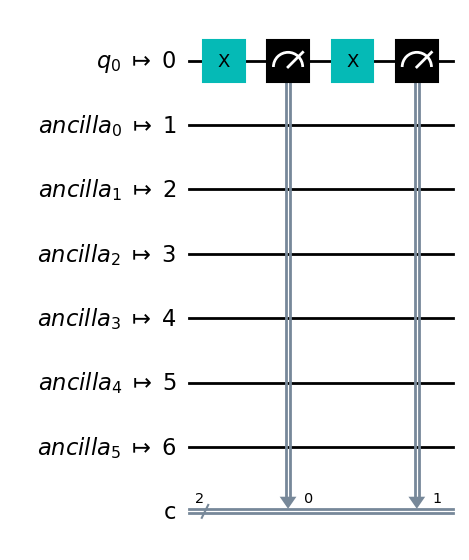

In [131]:
qcmidt=transpile(qc_mid,backend)
qcmidt.draw(output='mpl')

In [8]:
# qmidres=backend.run(qcmidt,shots=1000,dynamic=True)

# print(qmidres.job_id())
qmid=provider._runtime_client.job_get("chdt6h47nu2ein04acb0")

In [10]:
job_monitor(qmid)


In [11]:
qmid

{'id': 'chdt6h47nu2ein04acb0',
 'hub': 'ibm-q',
 'group': 'open',
 'project': 'main',
 'backend': 'ibmq_jakarta',
 'state': {'status': 'Completed'},
 'params': {'shots': 1000,
  'circuits': [<qiskit.circuit.quantumcircuit.QuantumCircuit at 0x7fe5ff059a80>],
  'meas_level': 2,
  'init_qubits': True},
 'program': {'id': 'qasm3-runner'},
 'created': '2023-05-10T17:24:20.253356Z',
 'cost': 7200,
 'status': 'Completed'}

### Hadamard gate on Mid-Circuit Measurement

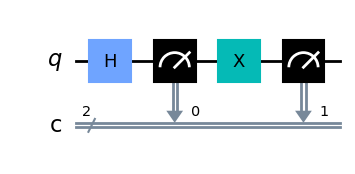

In [156]:
import numpy as np
qc_midcirc = QuantumCircuit(1, 2)

qc_midcirc.h(0)
qc_midcirc.measure(0, 0)
# qc_midcirc.u(theta=np.pi/2,phi=-np.pi/4,lam=np.pi/4,qubit=0)
qc_midcirc.x(0)
qc_midcirc.measure(0, 1)

qc_midcirc.draw(output="mpl", idle_wires=False)
# plot_bloch_multivector(qc_midcirc)

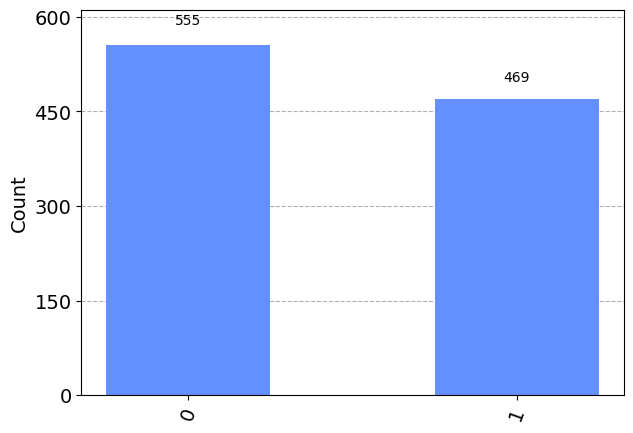

In [157]:
from qiskit.result import marginal_counts
res=sim.run(qc_midcirc).result()

res_0=marginal_counts(res,indices=[0]).get_counts()
res_1=marginal_counts(res,indices=[1]).get_counts()
plot_histogram(res_0)

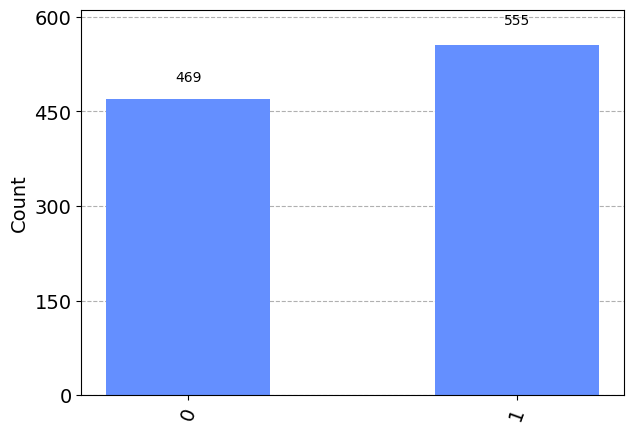

In [158]:
plot_histogram(res_1)

#### During the mid-circuit measurement (measurement one),  and  appear approximately 50% of the time. After we apply the X-gate (measurement two), the results are ideally the reverse of measurement one.

## Resets with dynamic circuits


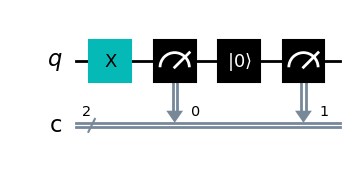

In [168]:
qc_reset = QuantumCircuit(1, 2)

qc_reset.x(0)
qc_reset.measure(0, 0)
qc_reset.reset(0)  
qc_reset.measure(0, 1)

qc_reset.draw(output="mpl", idle_wires=False)

In [169]:
res=sim.run(qc_reset).result()

res_0=marginal_counts(res,indices=[0]).get_counts()
res_1=marginal_counts(res,indices=[1]).get_counts()


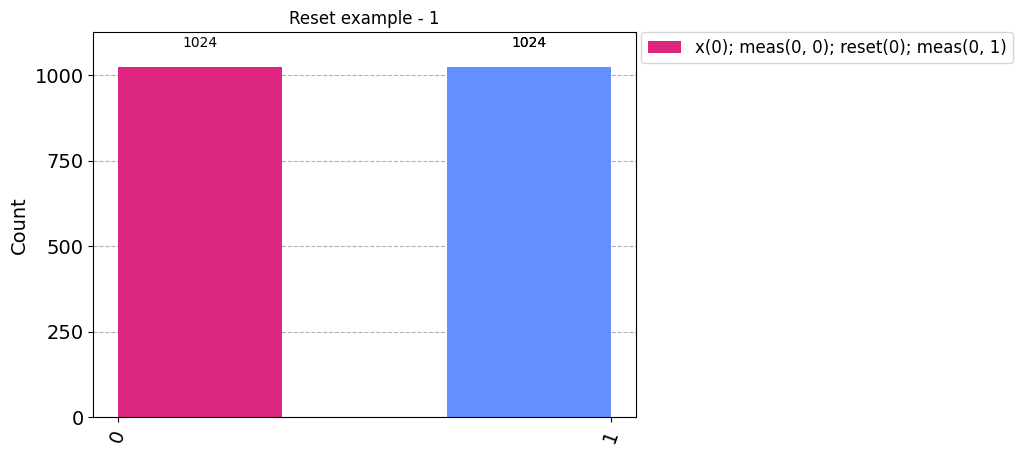

In [170]:
plot_histogram(
    [res_0, res_1],
    legend=["x(0); meas(0, 0)", "x(0); meas(0, 0); reset(0); meas(0, 1)"],
    title="Reset example - 1",
)

#### Apply the X-gate first to flip the initial state to $|1\rangle$ , and then apply the reset to bring the qubits back to ground state ($|0\rangle$).

### Reset After applying H-gate

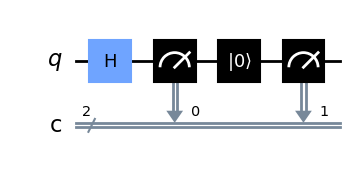

In [171]:
qc_reset = QuantumCircuit(1, 2)

qc_reset.h(0)
qc_reset.measure(0, 0)
qc_reset.reset(0)
qc_reset.measure(0, 1)

qc_reset.draw(output="mpl", idle_wires=False)

In [172]:
res=sim.run(qc_reset).result()

res_0=marginal_counts(res,indices=[0]).get_counts()
res_1=marginal_counts(res,indices=[1]).get_counts()


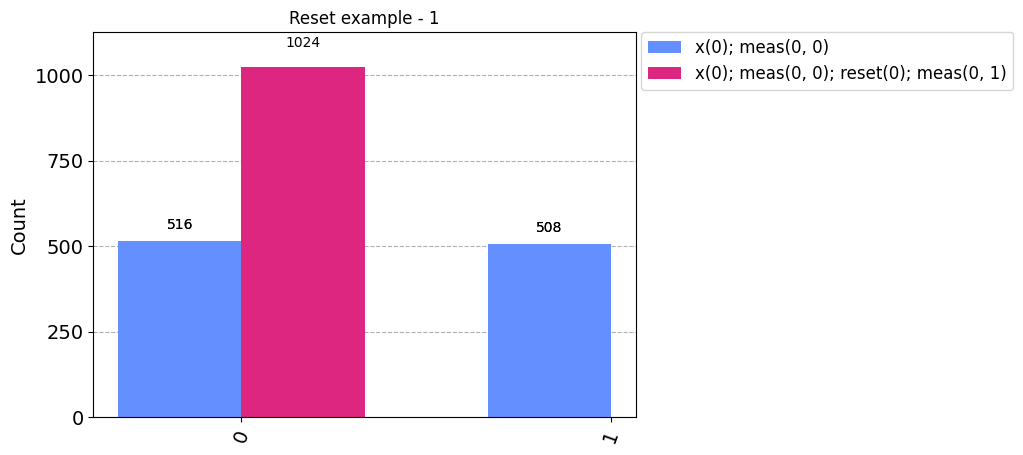

In [173]:
plot_histogram(
    [res_0, res_1],
    legend=["x(0); meas(0, 0)", "x(0); meas(0, 0); reset(0); meas(0, 1)"],
    title="Reset example - 1",
)

#### During the mid-circuit measurement (measurement one),  and  appear approximately 50% of the time. After we apply the reset gate (measurement two), ideally we get  100% of the time, which demonstrates how reset works.

## Control Flow

#### To program an if/else condition, you may use with circuit.if_test(<condition>)
---

#### Dynamic circuit capabilities such as if_test come with an associated latency introduced into the control system. This is due to the need to communicate measurement outcomes and the resulting decisions (the if_test condition) to all of the system’s qubit controllers (waveform generators/digitizers). This latency is currently on the order of 400-700 ns.

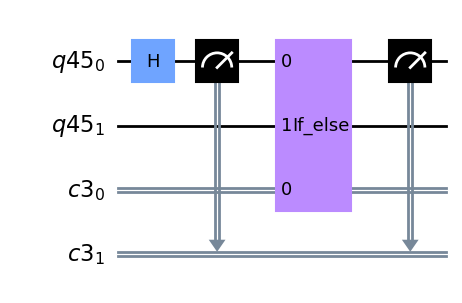

In [183]:
qr=QuantumRegister(2)
qcc=ClassicalRegister(2)
qc_if_else=QuantumCircuit(qr,qcc)

qc_if_else.h(qr[0])
qc_if_else.measure(qr[0],qcc[1])

with qc_if_else.if_test((qcc[0],True)) as else_:

    qc_if_else.x(0)
    # qc_if_else.reset(0)
with else_:
    qc_if_else.x(1)

qc_if_else.measure(qr[0],qcc[1]);
qc_if_else.draw(output="mpl", idle_wires=False)




In [184]:
res=sim.run(qc_if_else).result()

res_0=marginal_counts(res,indices=[0]).get_counts()
res_1=marginal_counts(res,indices=[1]).get_counts()


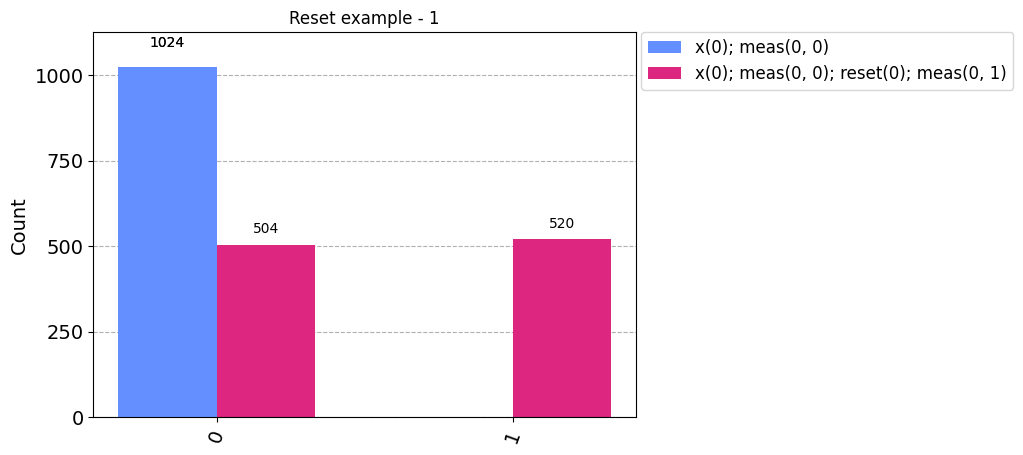

In [185]:
plot_histogram(
    [res_0, res_1],
    legend=["x(0); meas(0, 0)", "x(0); meas(0, 0); reset(0); meas(0, 1)"],
    title="Reset example - 1",
)

## Loops 

### For Loop

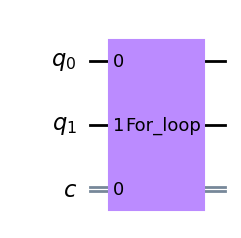

In [193]:
qc=QuantumCircuit(2,1)

with qc.for_loop(range(5)):
  
    qc.h(0)
    qc.cx(0,1)
    qc.measure(0,0)
    qc.break_loop().c_if(0,True)

qc.draw("mpl")


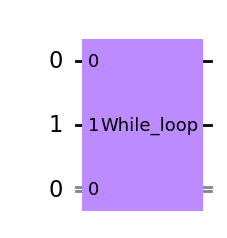

In [195]:
from qiskit.circuit import QuantumCircuit, Clbit, Qubit
bits = [Qubit(), Qubit(), Clbit()]
qc = QuantumCircuit(bits)

with qc.while_loop((bits[2], 0)):
    qc.h(0)
    qc.cx(0, 1)
    qc.measure(0, 0)
qc.draw("mpl")

### While Loop

In [39]:
config=backend.configuration()
n_qubit=config.n_qubits

In [40]:
config.multi_meas_enabled

True

### Simple Circuit

### x(0) -> measure(0,1) -> barrier(0,1) -> x(1) -> measure(0,1)

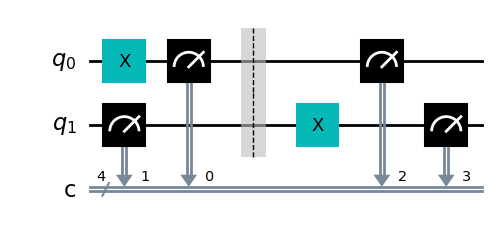

In [44]:
qc_simp = QuantumCircuit(2,4)
qc_simp.x(0)
qc_simp.measure([0,1], [0,1])
qc_simp.barrier([0,1])
qc_simp.x(1)
qc_simp.measure([0,1], [2,3])
qc_simp.draw(output="mpl")


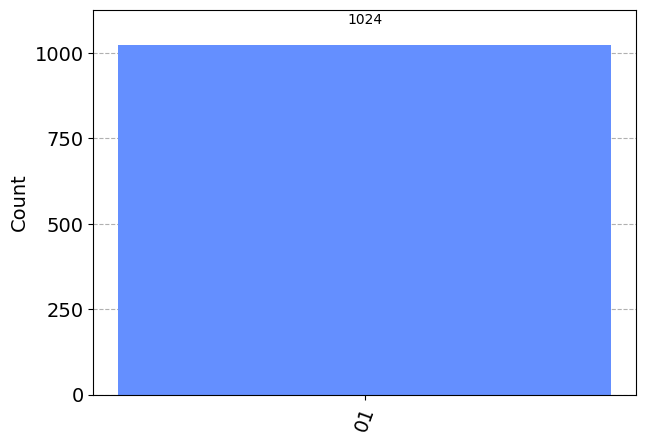

In [57]:
from qiskit.result import marginal_counts
res=sim.run(qc_simp).result()
res_01=marginal_counts(res,indices=[0,1]).get_counts()
res_23=marginal_counts(res,[2,3]).get_counts()
# count=res.get_counts()
plot_histogram(res_01)

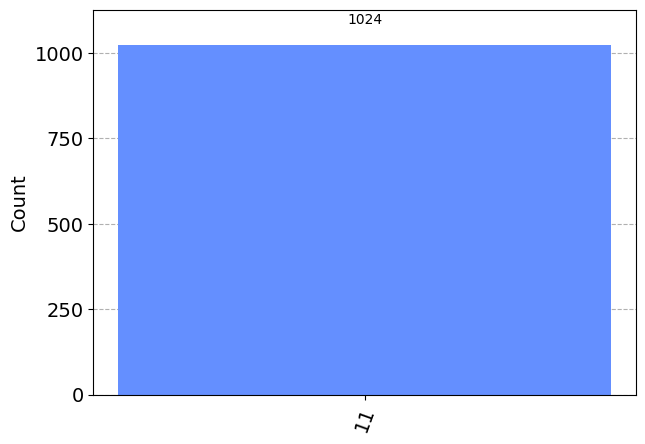

In [58]:
plot_histogram(res_23)

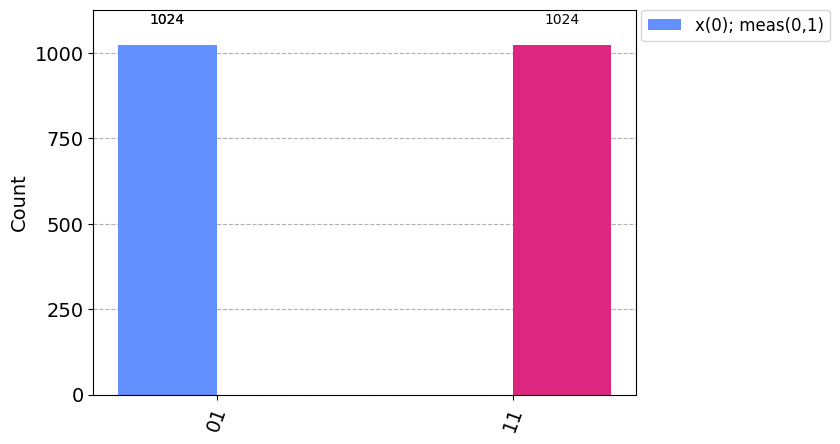

In [59]:
plot_histogram([res_01, res_23], 
               legend=['x(0); meas(0,1)', 'x(0); meas(0,1); x(1); meas(0,1)'])

In [19]:
from qiskit import QuantumCircuit, execute, transpile
from qiskit.providers.ibmq import least_busy
from qiskit.providers.ibmq import IBMQ
from qiskit.tools.monitor import job_monitor
IBMQ.delete_account()


IBMQ.save_account("515d40d7390ad00fa964008d996a10241d9484065e089728203df9254d935ce48662f809d09e3aff8d4cc2db5ea3eefdf4e4ec03af12dd8862bd8666e00c65d7")
# Load IBM Quantum account
# provider = IBMQ.load_account()


# job = backend.run(transpiled_qc)
# job_monitor(job)  # Displays job status under the cell


In [34]:
provider = IBMQ.load_account()


/tmp/ipykernel_17294/2080968637.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()
ibmqfactory.load_account:WARNING:2023-05-12 17:50:39,124: Credentials are already in use. The existing account in the session will be replaced.


In [35]:
backend = least_busy(provider.backends(
    filters=lambda b: b.configuration().n_qubits >= 3 and
    not b.configuration().simulator and b.status().operational == True ))

In [36]:
backend.name

<bound method BackendV1.name of <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>>

## Quantum Teleportation using dynamic Circuit


In [114]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
crb = ClassicalRegister(1, name="crb")
teleportation_circuit = QuantumCircuit(qr, crz, crx, crb)

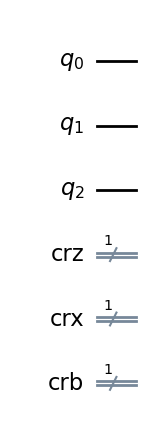

In [115]:
teleportation_circuit.draw('mpl')

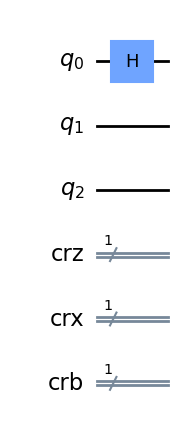

In [116]:
teleportation_circuit.h(qr[0])
teleportation_circuit.draw('mpl')

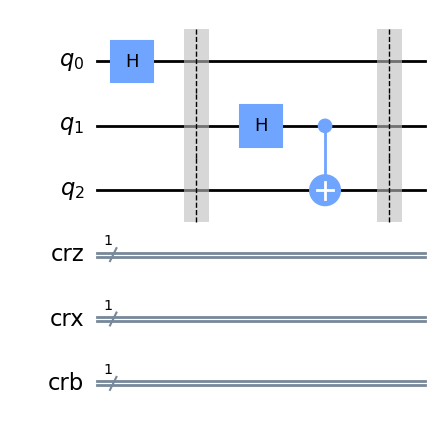

In [117]:
teleportation_circuit.barrier()
teleportation_circuit.h(qr[1])
teleportation_circuit.cx(qr[1],qr[2])
teleportation_circuit.barrier()
teleportation_circuit.draw('mpl')

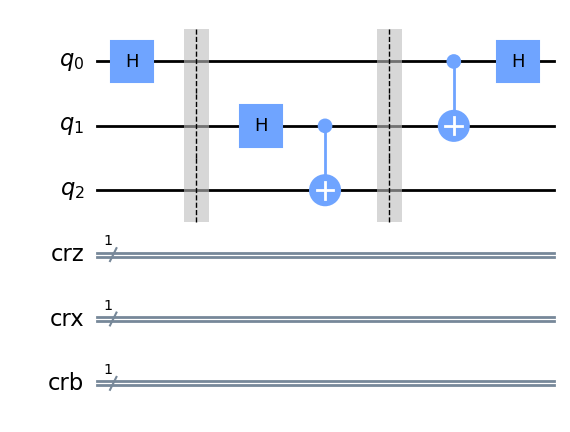

In [118]:
teleportation_circuit.cx(qr[0],qr[1])
teleportation_circuit.h(qr[0])
teleportation_circuit.draw('mpl')


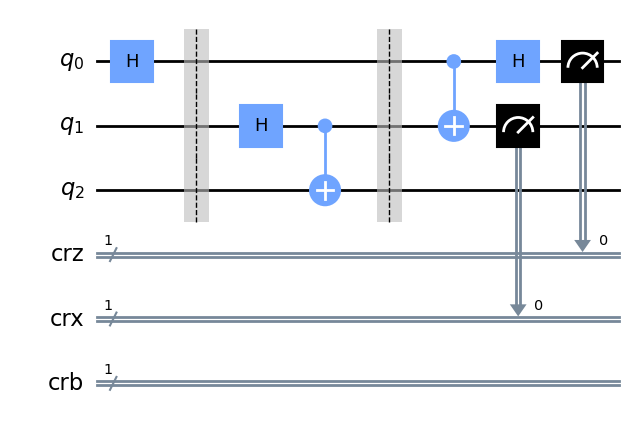

In [119]:
teleportation_circuit.measure(qr[0],crz)
teleportation_circuit.measure(qr[1],crx)
teleportation_circuit.draw('mpl')

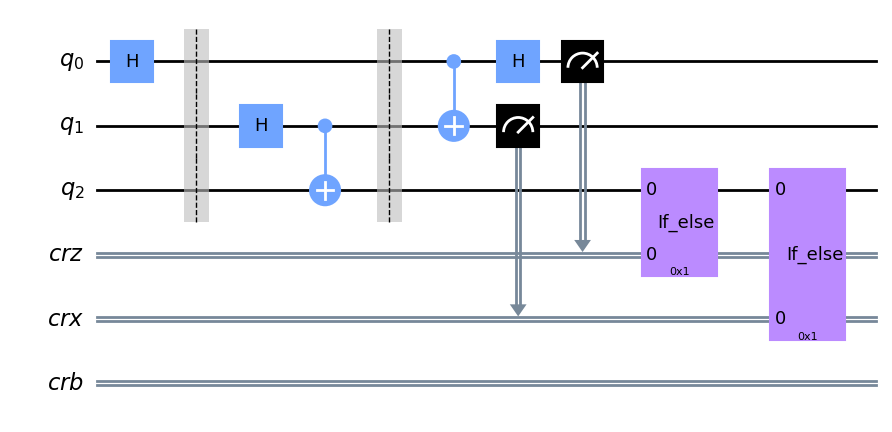

In [120]:
with teleportation_circuit.if_test((crz,1)):
    teleportation_circuit.z(qr[2])

with teleportation_circuit.if_test((crx,1)):
    teleportation_circuit.x(qr[2])
teleportation_circuit.draw('mpl')

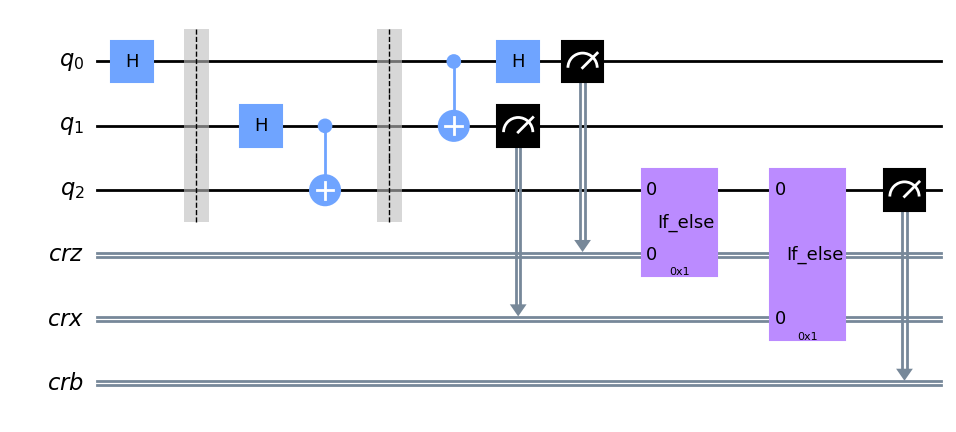

In [121]:
teleportation_circuit.measure(qr[2],crb)
teleportation_circuit.draw('mpl')

In [122]:
res=sim.run(teleportation_circuit).result()
count=res.get_counts()

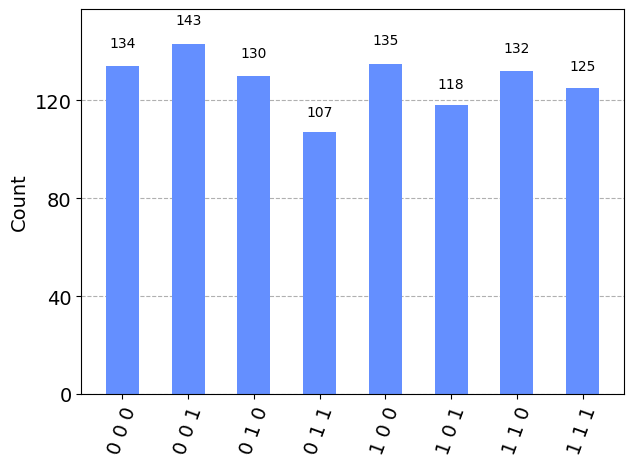

In [123]:
plot_histogram(count)

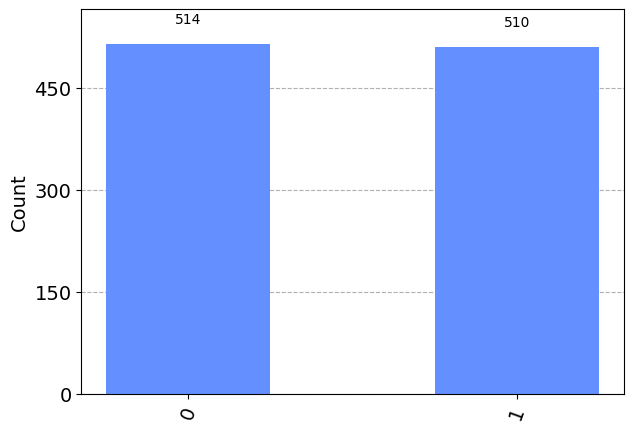

In [124]:
counts=marginal_counts(res,indices=[2]).get_counts()
plot_histogram(counts)